# 1 . python Implementation

In [1]:
# import required libraries
import numpy as np                     # import numpy library for Numerical calculation
import pandas as pd                    # import Pandas Library  for data manipulating and reading
import matplotlib.pyplot as plt        # import Matplotlib Library for visualisition
import seaborn as sns                  # import Seaborn Library   for visualisition

# Import warnings to ignore future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data file by importind it in DataFrame
data = pd.read_csv("data.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# ID column is not require for model training , so we drop it.
data.drop('Id',axis=1,inplace=True)

# 2 . Domain Analysis 

- **SalePrice :** the property's sale price in dollars. This is the target variable that you're trying to predict.
- **MSSubClass:** The building class
- **MSZoning:** The general zoning classification
- **LotFrontage:** Linear feet of street connected to property
- **LotArea:** Lot size in square feet
- **Street:** Type of road access
- **Alley:** Type of alley access
- **LotShape:** General shape of property
- **LandContour:** Flatness of the property
- **Utilities:** Type of utilities available
- **LotConfig:** Lot configuration
- **LandSlope:** Slope of property
- **Neighborhood:** Physical locations within Ames city limits
- **Condition1:** Proximity to main road or railroad
- **Condition2:** Proximity to main road or railroad (if a second is present)
- **BldgType:** Type of dwelling
- **HouseStyle:** Style of dwelling
- **OverallQual:** Overall material and finish quality
- **OverallCond:** Overall condition rating
- **YearBuilt:** Original construction date
- **YearRemodAdd:** Remodel date
- **RoofStyle:** Type of roof
- **RoofMatl:** Roof material
- **Exterior1st:** Exterior covering on house
- **Exterior2nd:** Exterior covering on house (if more than one material)
- **MasVnrType:** Masonry veneer type
- **MasVnrArea:** Masonry veneer area in square feet
- **ExterQual:** Exterior material quality
- **ExterCond:** Present condition of the material on the exterior
- **Foundation:** Type of foundation
- **BsmtQual:** Height of the basement
- **BsmtCond:** General condition of the basement
- **BsmtExposure:** Walkout or garden level basement walls
- **BsmtFinType1:** Quality of basement finished area
- **BsmtFinSF1:** Type 1 finished square feet
- **BsmtFinType2:** Quality of second finished area (if present)
- **BsmtFinSF2:** Type 2 finished square feet
- **BsmtUnfSF:** Unfinished square feet of basement area
- **TotalBsmtSF:** Total square feet of basement area
- **Heating:** Type of heating
- **HeatingQC:** Heating quality and condition
- **CentralAir:** Central air conditioning
- **Electrical:** Electrical system
- **1stFlrSF:** First Floor square feet
- **2ndFlrSF:** Second floor square feet
- **LowQualFinSF:** Low quality finished square feet (all floors)
- **GrLivArea:** Above grade (ground) living area square feet
- **BsmtFullBath:** Basement full bathrooms
- **BsmtHalfBath:** Basement half bathrooms
- **FullBath:** Full bathrooms above grade
- **HalfBath:** Half baths above grade
- **Bedroom:** Number of bedrooms above basement level
- **Kitchen:** Number of kitchens
- **KitchenQual:** Kitchen quality
- **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)
- **Functional:** Home functionality rating
- **Fireplaces:** Number of fireplaces
- **FireplaceQu:** Fireplace quality
- **GarageType:** Garage location
- **GarageYrBlt:** Year garage was built
- **GarageFinish:** Interior finish of the garage
- **GarageCars:** Size of garage in car capacity
- **GarageArea:** Size of garage in square feet
- **GarageQual:** Garage quality
- **GarageCond:** Garage condition
- **PavedDrive:** Paved driveway
- **WoodDeckSF:** Wood deck area in square feet
- **OpenPorchSF:** Open porch area in square feet
- **EnclosedPorch:** Enclosed porch area in square feet
- **3SsnPorch:** Three season porch area in square feet
- **ScreenPorch:** Screen porch area in square feet
- **PoolArea:** Pool area in square feet
- **PoolQC:** Pool quality.
- **Fence:** Fence quality.
- **MiscFeature:** Miscellaneous feature not covered in other categories .
- **MiscVal:** Value of miscellaneous feature .
- **MoSold:** Month Sold
- **YrSold:** Year Sold
- **SaleType:** Type of sale
- **SaleCondition:** Condition of sale

# Basic Checks & find Insights

In [4]:
# All columns are not visible ,  so to display all Columns
pd.set_option("display.max_columns",None)

In [5]:
# see first five observations
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# to see last five observations
data.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
# To get information about data Type & its column's missing values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Insights from datainfo().
- we can see that we have Total 1460 observations with 81 Columns from 0-80 in which ,
                                                              - 3 columns are float64 data type
                                                              - 35 columns are int64 data type
                                                              - 43 columns are object type data
- Columns like 'Alley' , 'poolQc' ,'Fence' , 'MiscFeature' have more then 80 % null values , so we drop them with 'ID' column .

In [8]:
# statistical information about Numerical variable
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Insights from Describe() .
- 'MasVnrArea' , '2ndFlrSF' , 'BsmtFullBath' , 'HalfBath' and 'WoodDeckSF' columns have more than **50 % data is Zero** . 

- 'BsmtFinSF2' , 'LowQualFinSF' , 'BsmtHalfBath' , 'EnclosedPorch' , '3SsnPorch' , 'ScreenPorch' , 'PoolArea' and 'MiscVal' columns have more than **75 % data is Zero** .

In [9]:
# statistical information about Numerical variable
data.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


### Insights :
- MSZoning has five type of Zones inwhich **top Zone is RL of 1151 counts.**
- there are 2 types of street, but **pave has 1454 counts** so only 6 houses has other street.
- **Alley has only 91** houses available but rest are missing.(drop it )
- Lotshape has 4 Types and Reg type has 925 houses.
- LandContour has 4 Levels but **Lavel 1 has 1311 houses.**
- Utilities has 2 types and **AllPub has 1459 times** (we can Drop it).
- LotConfig has 5 types but inside LotConfig has 1052 houses.
- LandSlope has 3 types but **Gtl type in 1382 houses.**
- Neighborhoods are 25 types and Names has 225 house.
- Condition1 has 9 unique in which **Norm 1260** and Condition2 has 8 uniques in which **1445 has 1Fam type** houses.
- BldgType are 5 types ,**1Fam has in 1220 houses**.
- **1256 houses were used unf** for BsmtFinType2.
- HouseStyle have 8 different types but most house(726) has 1Story style.
- RoofStyle has 6 types and **1141 houses has Gable type.**
- RoofMatl is 8 type material but **1434 houses are used CompShg material**.
- **1428 houses has GasA Heating** type , 741 house has Ex HeatingQC and **1365 house has Central Air**.
- **1334 houses has SBrkr Type Electric**, 380 houses has Gd Type of FireplaceQu and 870 houses has Attached GarageType.
- **1267 houses were WD saletype and 1198 houses has Normal SaleCondition**.
- Exterior1st is 15 types ,Exterior2nd is 16 types but 504 + houses used VinylSd in 1st & 2nd Exterior.
- MasVnrType is 4 types, 864 houses are not used MasVnrType.
- TA Brand is used in more houses in ExterQual,ExterCond, BsmtQual,BsmtCond,KitchenQual,GarageQual & GarageCond .
- 647 house has PCons foundation.
- 953 houses are not used BsmtExposure but 430 houses were used Unf for BsmtFinType1.

# 3 . EDA (univariate , Bi-Variate ) and Find Insights

## Univariate Analysis

In [10]:
# use a for loop to find only Numerical columns.
data_num = []                      # create a empty List
for i in data.columns:             # use for loop in data.columns
    if data[i].dtype!='O':         # use if condition to find only numerical features
        data_num.append(i)         # Append that columns which satisfy the if condition
print(data_num, end=' ')

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 

In [11]:
data_num = data[data_num]                  # create a Numerical Variable contain only numerical features
data_cat = data.drop(data_num,axis=1)      # create a categorical variable contain only Categorical features

In [12]:
# install sweetviz
!pip install sweetviz

In [13]:
import sweetviz as sv                                                  # import Sweetviz
sv_report = sv.analyze(data)                                       # Analyze report
sv_report.show_html('House_Price_Analysis_report.html')              # Show report in  html

                                             |                                             | [  0%]   00:00 ->…

Report House_Price_Analysis_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


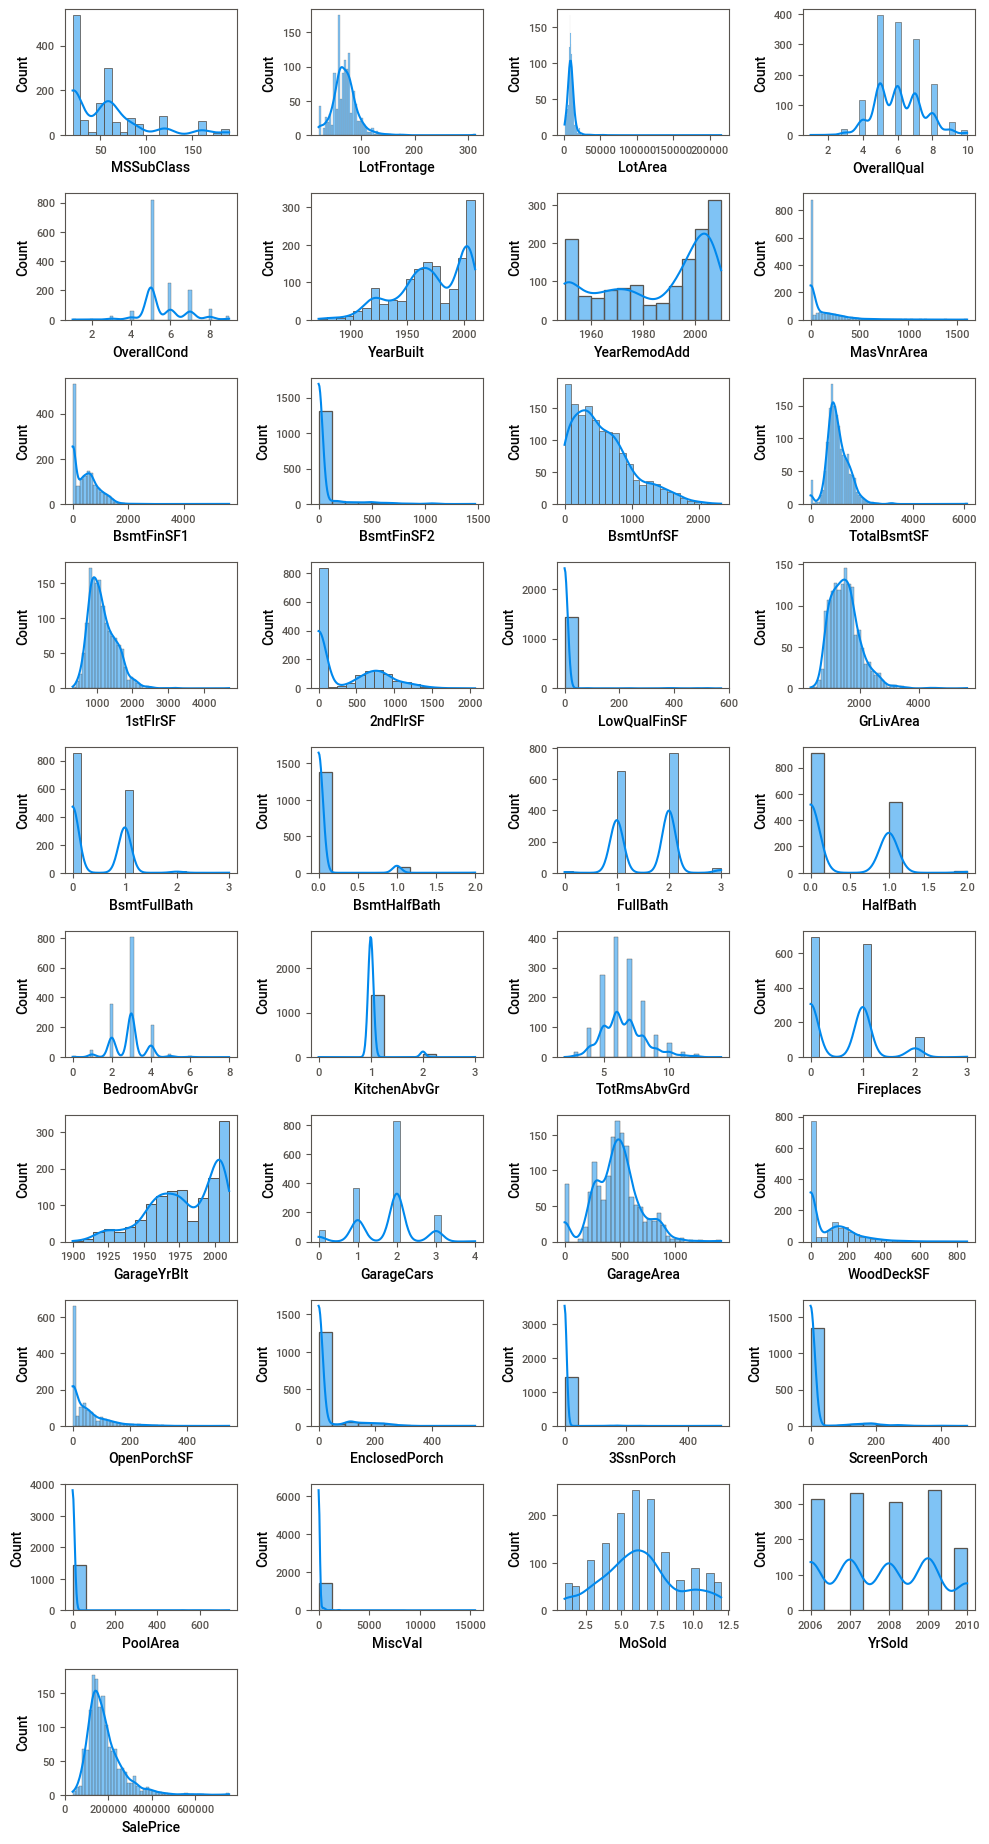

In [14]:
## Univariate Analysis of Numerical Data

plt.figure(figsize=(10,20))               # Set Canvas size
plotnumber = 1                            # Create a variable
for i in data_num:                        # use for loop to iterate Numerical Variable
    plt.subplot(11,4,plotnumber)          # set number of rows & columns according to No.of Variable
    sns.histplot(x=data_num[i],kde=True)   # plot histogram
    plotnumber = plotnumber + 1
plt.tight_layout()                        # to avoid overlapping of plots

### Insights from univariate Analysis of Numerical Feature : -

- Most of the House has less than 25 MSSubClass , 60 to 80 LotFrontage , 7000 to 12000 LotArea , 5 to 7 OverallQual & 
5 OverallCond but no MasVnrArea .
- Most Houses has Zero BsmtFinSF1 but 1293 house has not BsmtFinSF2 , less than 1000 sq.feet BsmtUnfSF , 700 to 1500 Sq.f 
TotalBsmtSF area & 1stFlrSF area but no 2ndFlrSF but not done LowQualFinSF and 800 to 1700 sq.f area has GrLivArea .
- Most of the House has not BsmtFullBath & HalfBath ,  1 or 2 FullBath rooms above grade & less house has 1 HalfBath room.
- Most House has 3 BHK and one firePlace
- Most Garages has 2 cars Capacity which area ranges from 300 to 600 sq.f but no Porch & pool area 
- More houses were Solded in May , Jun , July month only .
- More houses are sold in range of 120000 to 170000
- Most Houses are Build after 2000 with Garage , but those houses were built before 1950 are Remodeled but 
after 2009 house sold is decreased.

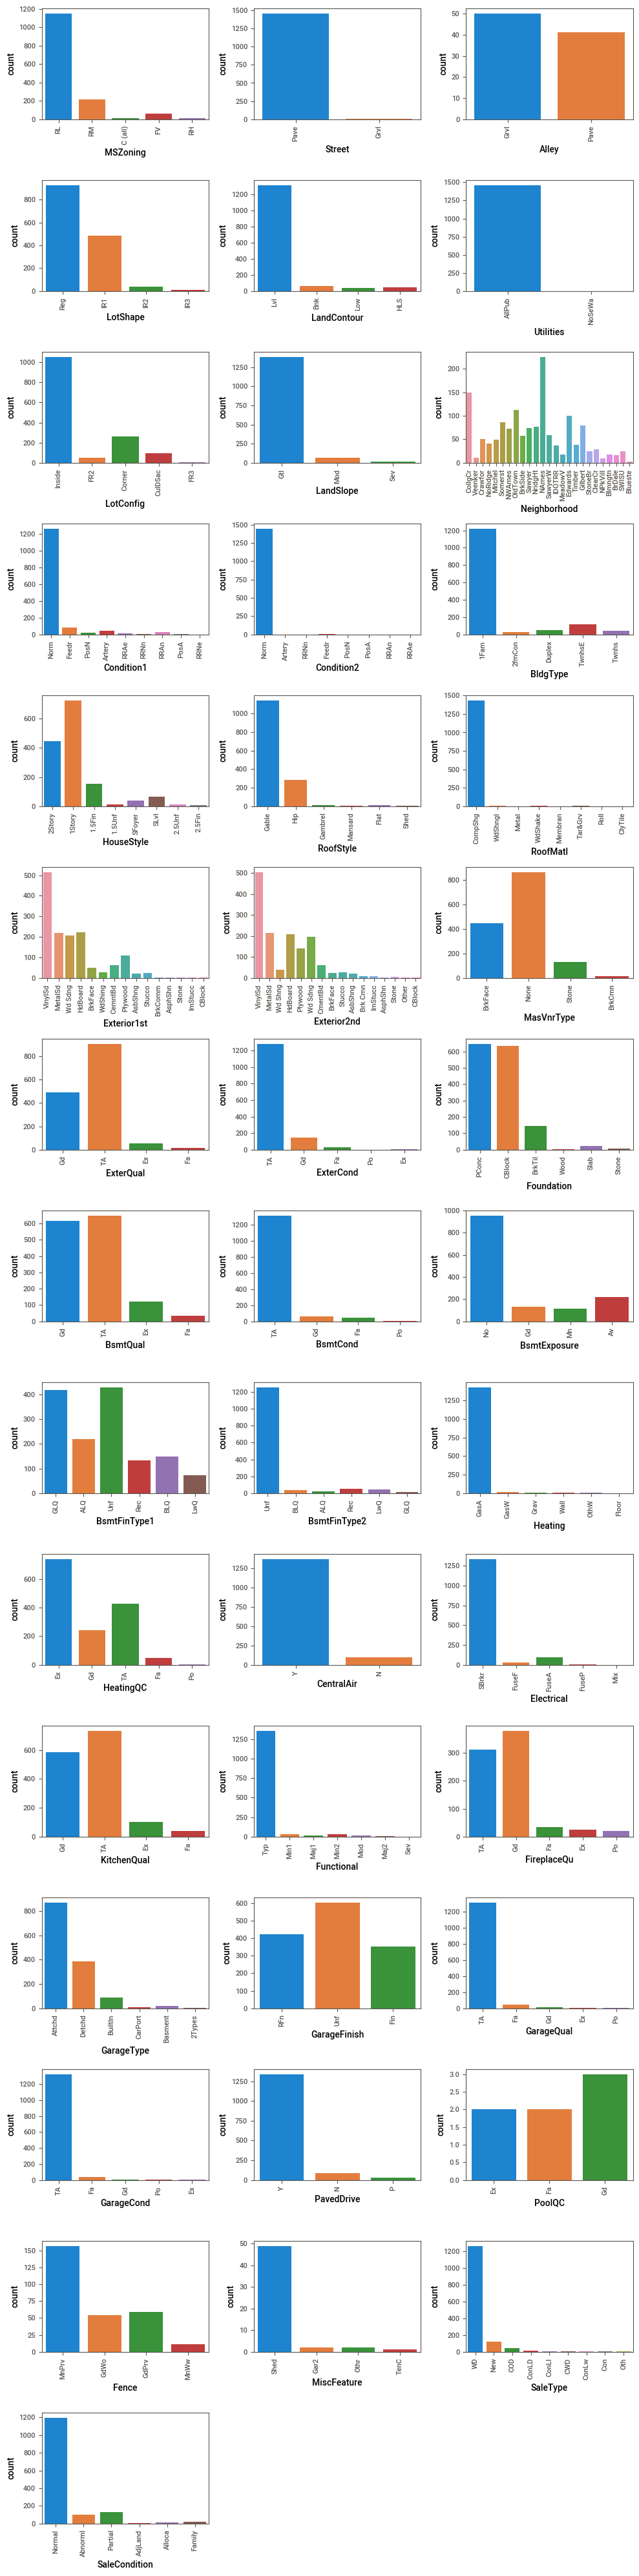

In [15]:
## Univariate Analysis of Categorical Data

plt.figure(figsize=(10,40))         # Set Canvas size
plotnumber = 1                      # Create a variable
for i in data_cat:                     # use for loop to iterate Numerical Variable
    plt.subplot(15,3,plotnumber)    # set number of rows & columns according to No.of Variable
    sns.countplot(x=data_cat[i])        # plot Countplot
    plt.xticks(rotation=90)
    plotnumber = plotnumber + 1
plt.tight_layout()                  # to avoid overlapping of plots

### Insights from univariate Analysis of Categorical Feature : -

- Most of the Houses has RL Zoning , Pave Street  , Reg Lotshape, Lv1 LandContour , Allpub Utilities  , Inside LotConfig , Gtl LandSlope , Names Neighborhood , Norm Condition 1 & 2 .
- Most House's has 1Fam Bulding Type and Designed with 1Story HouseStyle , Gable RoofStyle ,Compshg Roof Material , VinylSD Exterior for 1st & 2nd floor , No MasVnrType , TA Exter Quality  & Condition , PCone & cBlock Foundation , GD & TA Quality Basement with TA Condition , GLQ & Unf BsmtFinType1 but no BsmtExposure .
- Most House has GasA Heating , EX Heating quality with Central Air , SBrkr Electrical , Gd or TA Kitchen & Fireplace Quality of Typ Functional  . 
- The House's has TA condition & quality Unf finished Attached Garage with Paved Drive ,Gd PoolQC , MnPrv Fence , Shed MiscFeature .
- Most of the Houses were sold with WD type Sale and in Normal Sale Condition.

## Bi - Variate Analysis

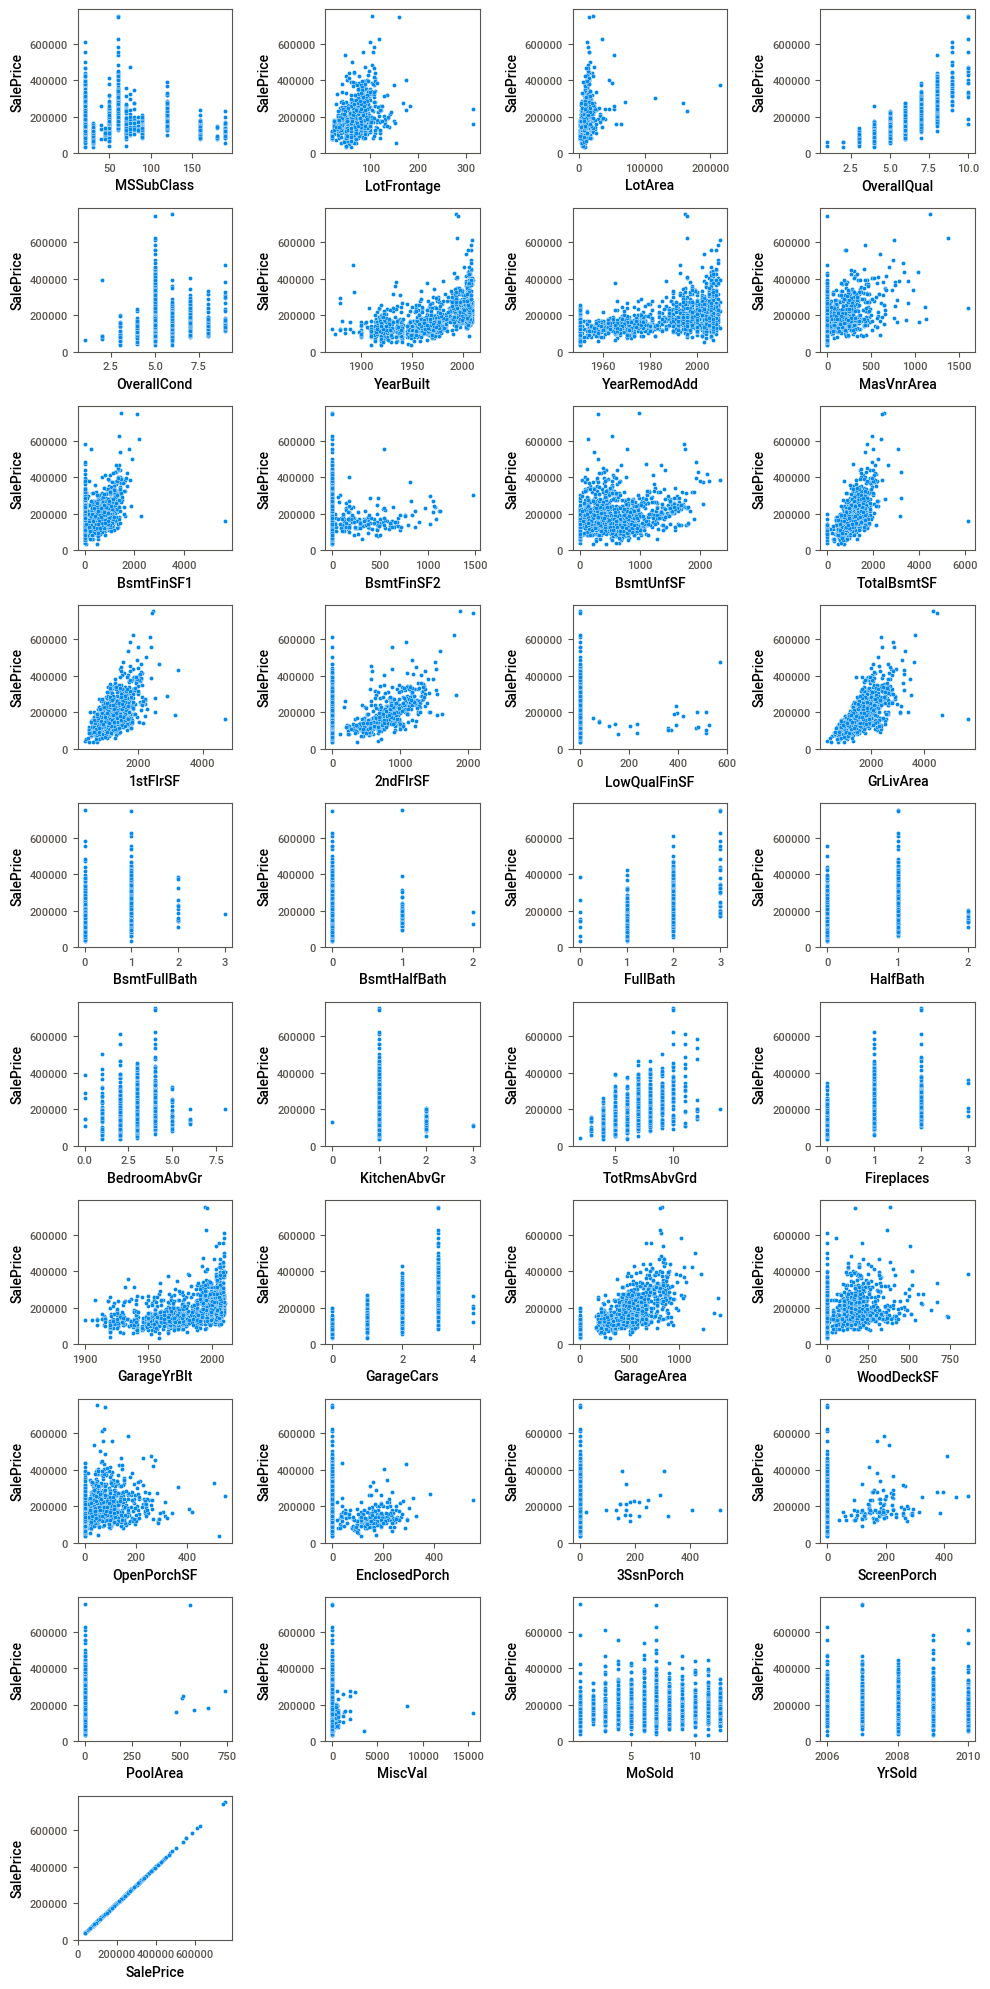

In [16]:
## Bi - variate Analysis of Numerical Data

plt.figure(figsize=(10,20))            # Set Canvas size
plotnumber = 1                         # Create a variable
for i in data_num:                     # use for loop to iterate Numerical Variable
    plt.subplot(10,4,plotnumber)       # set number of rows & columns according to No.of Variable
    sns.scatterplot(x=data_num[i],y=data.SalePrice)        # plot Countplot
    plotnumber = plotnumber + 1
plt.tight_layout()                     # to avoid overlapping of plots

### Customer Spending Higher Money on Following :-
- Overall Quality , Total Basement area(1st or 2nd floor) , Full Bathroom , Total Rooms above Ground , Garage Area .
- Recently Built House or less house Age.

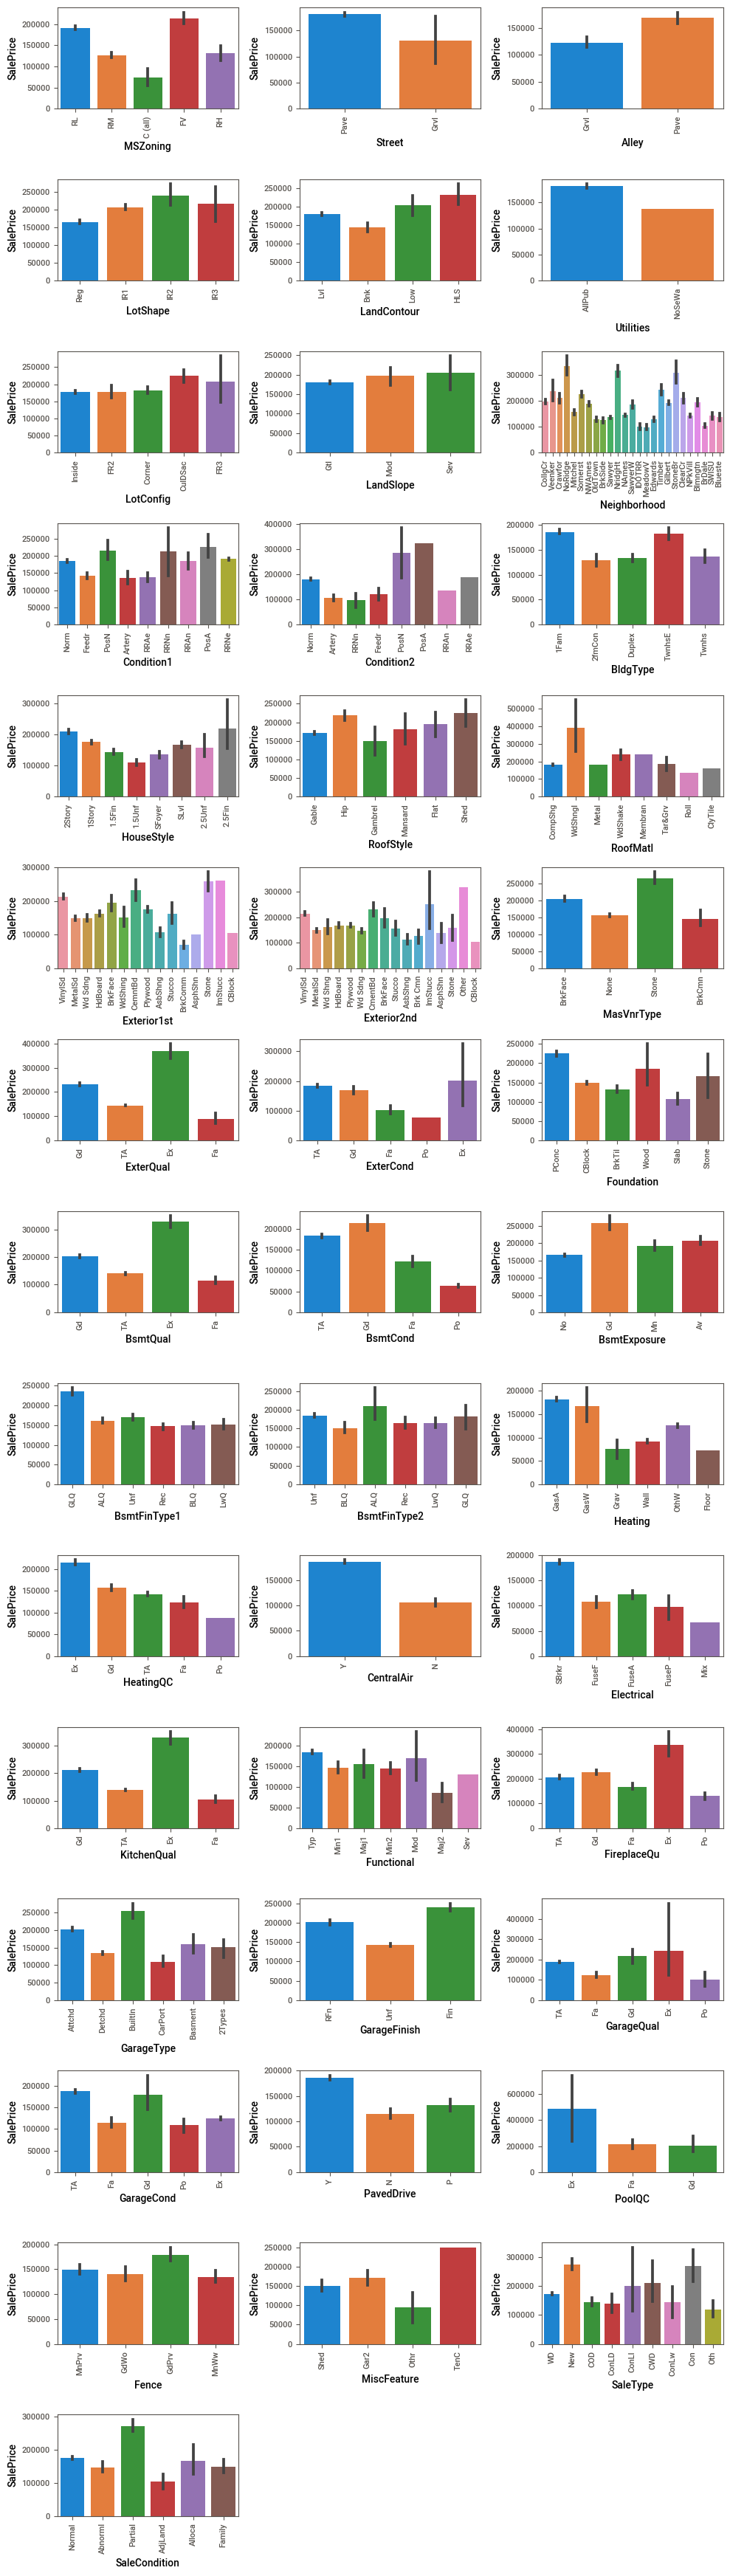

In [17]:
## Bi - Variate Analysis of Categorical Data

plt.figure(figsize=(10,35))         # Set Canvas size
plotnumber = 1                      # Create a variable
for i in data_cat:                     # use for loop to iterate Numerical Variable
    plt.subplot(15,3,plotnumber)    # set number of rows & columns according to No.of Variable
    sns.barplot(x=data_cat[i],y=data['SalePrice'])        # plot Countplot
    plt.xticks(rotation=90)
    plotnumber = plotnumber + 1
plt.tight_layout()                  # to avoid overlapping of plots

### Customer Spending Higher Money on the following :-

- House's Having FV & RL Zoning area , Pave Street or Alley , AllPub Utilities ,RRNn Condition1 , PosN Condition2 . 
- ( 1Fam,TwnhsE )Type Building , House Style of 2.5Fin , (hip, Shed) Roof Style , Wdshngl Roof material ,
 (Stone ,ImStuck) Exterior , Stone MasVnrtype ,Ex Exter Quality & Condition , PConc Foundation , EX basement quality & Gd 
Condition or Exposure , finishing in GLQ Type1 , 
- GasA & GasW Heating , Ex HeatingQC , EX KitchenQC  , EX FirPlaceQc , having Central air ,SBrkr Electrical .
-  Builtin & Finished Garage of Excelent Quality , Good Condition with Paved Drive.
- Ex PoolQC , GdPrv Fence , TenC MiscFeatur
- Partial SaleCondition and New , Con ,ConLi Sale Type.

# Data Preprocessing

## i .  Handle Missing Values

In [18]:
# Checking Total missing Values of each features
#pd.set_option("display.max_rows",None) # To display all rows
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [19]:
# create a list of features in which more than 45 % data is  missing
lst_null_values = []                                      # create an empty list
for i in data:                                            # use for loop to iterate in data
    if (data[i].isnull().sum() / len(data))*100 > 45 :    # use a if condition for null values grater than 45 %
        lst_null_values.append(i)                         # Append this feature name in empty list
print(lst_null_values)                                    # print list containing 45% null value features

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [20]:
data.drop(lst_null_values,axis=1,inplace = True)          # drop columns containing more than 45 % null values       

In [21]:
# filter Missing value columns using for loop
for i in data:
    if (data[i].isnull().sum() >= 1) :              # give a if condition for grater than equal 1 missing value
        print(i,' = ',data[i].isnull().sum())       # print

LotFrontage  =  259
MasVnrType  =  8
MasVnrArea  =  8
BsmtQual  =  37
BsmtCond  =  37
BsmtExposure  =  38
BsmtFinType1  =  37
BsmtFinType2  =  38
Electrical  =  1
GarageType  =  81
GarageYrBlt  =  81
GarageFinish  =  81
GarageQual  =  81
GarageCond  =  81


In [22]:
# Impute Missing values in those features which have upto 20 %  Missing data , 
#by Central Tendency (Mean , median , mode) using Fillna Method
data['LotFrontage'].fillna(data['LotFrontage'].median(),inplace=True)
data['MasVnrType'].fillna(data['MasVnrType'].mode()[0],inplace=True)
data['MasVnrArea'].fillna(int(data['MasVnrArea'].mean()),inplace=True)
data['BsmtQual'].fillna(data['BsmtQual'].mode()[0],inplace=True)
data['BsmtCond'].fillna(data['BsmtCond'].mode()[0],inplace=True)
data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0],inplace=True)
data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0],inplace=True)
data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0],inplace=True)
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)
data['GarageType'].fillna(data['GarageType'].mode()[0],inplace=True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(),inplace=True)
data['GarageFinish'].fillna(data['GarageFinish'].mode()[0],inplace=True)
data['GarageQual'].fillna(data['GarageQual'].mode()[0],inplace=True)
data['GarageCond'].fillna(data['GarageCond'].mode()[0],inplace=True)

## ii . Convert Categorical to Numerical

In [23]:
# use a for loop to display value counts of all categorical data
for i in data:                                                                    # use a for loop
    if data[i].dtype == "O" :                                                     # use a if condition only for Categorical data
        print(f'The value counts of  --  {i}  :--  \n{data[i].value_counts()}')   # print this categorical data's value counts
        print('====================================================')

The value counts of  --  MSZoning  :--  
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
The value counts of  --  Street  :--  
Pave    1454
Grvl       6
Name: Street, dtype: int64
The value counts of  --  LotShape  :--  
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
The value counts of  --  LandContour  :--  
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
The value counts of  --  Utilities  :--  
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
The value counts of  --  LotConfig  :--  
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
The value counts of  --  LandSlope  :--  
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
The value counts of  --  Neighborhood  :--  
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer  

In [24]:
# Create a list of features which feature contain more than 80 % one unique value
max_unique = []                                                    # create an empty list
for i in data:                                                     # use for loop to iterate in data
        if data[i].dtype == "O" :                                  # use a if condition only for Categorical data
            if (data[i].value_counts().max() / len(data) )*100 > 80 :   # use a if condition for max_unique values grater than 80 %
                max_unique.append(i)                                    # Append this feature name in empty list
        
print(max_unique,end=' ')                                        # print list containing 80% one unique value features

['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 

In [25]:
# Drop features which contains more than 80 % one unique value 
data = data.drop(max_unique,axis=1) 
#  because when a feature contain more than 80 % only one unique value it will considerd as  only one unique value
# and that feature is not make any impact to our model

In [26]:
# use a for loop to find Available Categorical columns.
cat_columns = []                   # create a empty List
for i in data.columns:             # use for loop in data.columns
    if data[i].dtype=='O':         # use if condition to find only Categorical features
        cat_columns.append(i)      # Append that columns which satisfy the if condition
print(cat_columns, end=' ')

['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish'] 

In [27]:
from sklearn.preprocessing import LabelEncoder  # Import Label Encoder to convert Categorical Features into Numerical 
Lc = LabelEncoder()                             # Call LabelEncoder 

In [28]:
# Convert Available Categorical Features to Numerical by Label Encoding Technique
data['MSZoning'] = Lc.fit_transform(data['MSZoning'])
data['LotShape'] = Lc.fit_transform(data['LotShape'])
data['LotConfig'] = Lc.fit_transform(data['LotConfig'])
data['Neighborhood'] = Lc.fit_transform(data['Neighborhood'])
data['HouseStyle'] = Lc.fit_transform(data['HouseStyle'])
data['RoofStyle'] = Lc.fit_transform(data['RoofStyle'])
data['Exterior1st'] = Lc.fit_transform(data['Exterior1st'])
data['Exterior2nd'] = Lc.fit_transform(data['Exterior2nd'])
data['MasVnrType'] = Lc.fit_transform(data['MasVnrType'])
data['ExterQual'] = Lc.fit_transform(data['ExterQual'])
data['Foundation'] = Lc.fit_transform(data['Foundation'])
data['BsmtQual'] = Lc.fit_transform(data['BsmtQual'])
data['BsmtExposure'] = Lc.fit_transform(data['BsmtExposure'])
data['BsmtFinType1'] = Lc.fit_transform(data['BsmtFinType1'])
data['HeatingQC'] = Lc.fit_transform(data['HeatingQC'])
data['KitchenQual'] = Lc.fit_transform(data['KitchenQual'])
data['GarageType'] = Lc.fit_transform(data['GarageType'])
data['GarageFinish'] = Lc.fit_transform(data['GarageFinish'])

## 2 . Handle Outlier

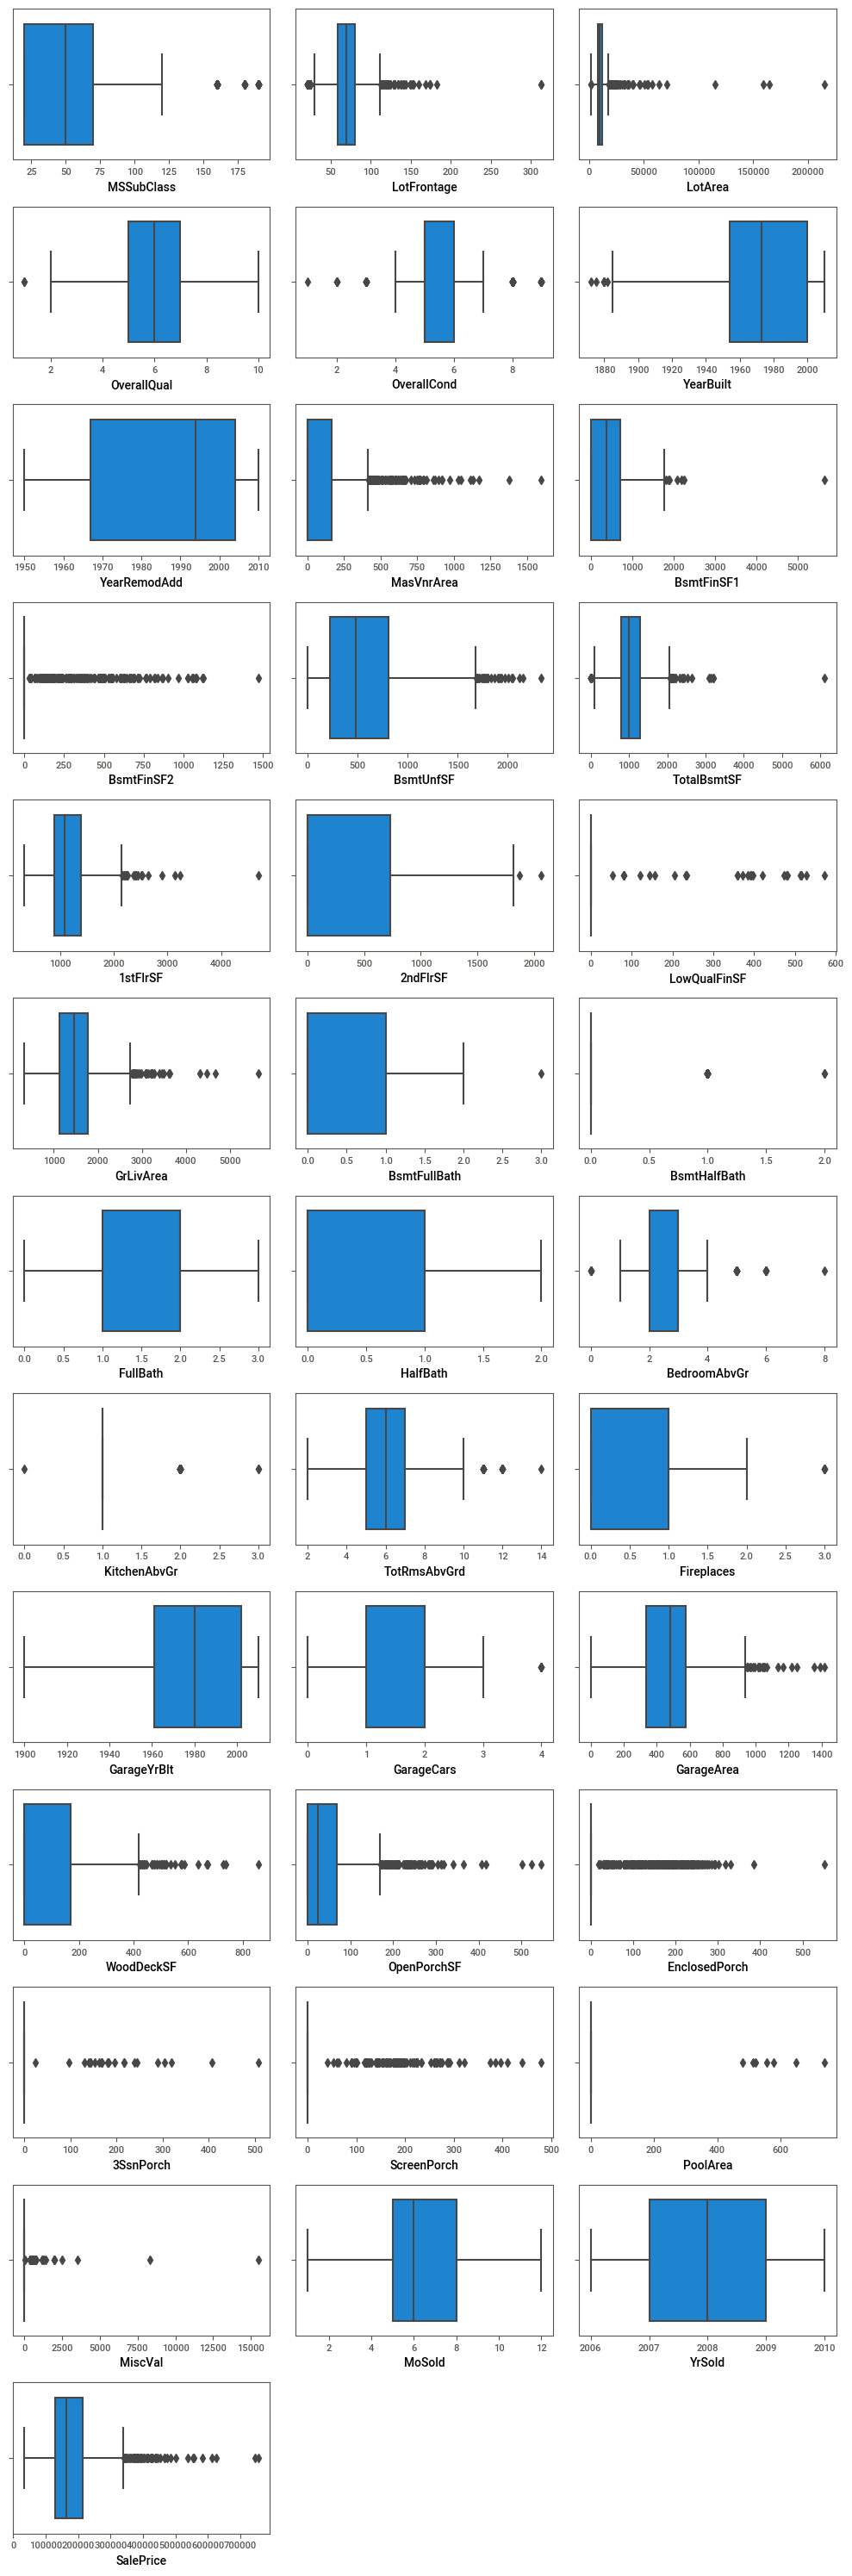

In [29]:
## plot Box - Plot to see the 5 number Summery

plt.figure(figsize=(10,30))             # Set Canvas size
plotnumber = 1                          # Create a variable
for i in data_num :                      # use for loop to iterate Numerical Variable
    plt.subplot(13,3,plotnumber)         # set number of rows & columns according to No.of Variable
    sns.boxplot(x=data_num[i])          # plot Box - plot
    plotnumber = plotnumber + 1
plt.tight_layout()                      # to avoid overlapping of plots

In [30]:
# we can Drop the following features in which approximately 80 % data is Zero :-
# 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'

Zero_lst = ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'] 
# Drop these Zero containing features
data = data.drop(Zero_lst,axis=1)

In [31]:
data.loc[data['MSSubClass']>150,'MSSubClass'] = data['MSSubClass'].median()
data.loc[data['LotFrontage']>200,'LotFrontage'] = data['LotFrontage'].median()
data.loc[data['LotArea']>60000,'LotArea'] = data['LotArea'].median()
data.loc[data['MasVnrArea']>1000,'MasVnrArea'] = int(data['MasVnrArea'].mean())
data.loc[data['BsmtFinSF1']>2000,'BsmtFinSF1'] = data['BsmtFinSF1'].median()
data.loc[data['BsmtUnfSF']>2000,'BsmtUnfSF'] = data['BsmtUnfSF'].median()
data.loc[data['TotalBsmtSF']>2500,'TotalBsmtSF'] = data['TotalBsmtSF'].median()
data.loc[data['1stFlrSF']>2500,'1stFlrSF'] = data['1stFlrSF'].median()
data.loc[data['2ndFlrSF']>1900,'2ndFlrSF'] = data['2ndFlrSF'].median()
data.loc[data['GrLivArea']>3600,'GrLivArea'] = data['GrLivArea'].median()
data.loc[data['GarageArea']>1100,'GarageArea'] = data['GarageArea'].median()
data.loc[data['WoodDeckSF']>600,'WoodDeckSF'] = int(data['WoodDeckSF'].mean())
data.loc[data['OpenPorchSF']>320,'OpenPorchSF'] = data['OpenPorchSF'].median()
data.loc[data['SalePrice']>550000,'SalePrice'] = data['SalePrice'].median()

In [32]:
data.shape

(1460, 47)

# Feature Engineering / Selection

### Correlation Method

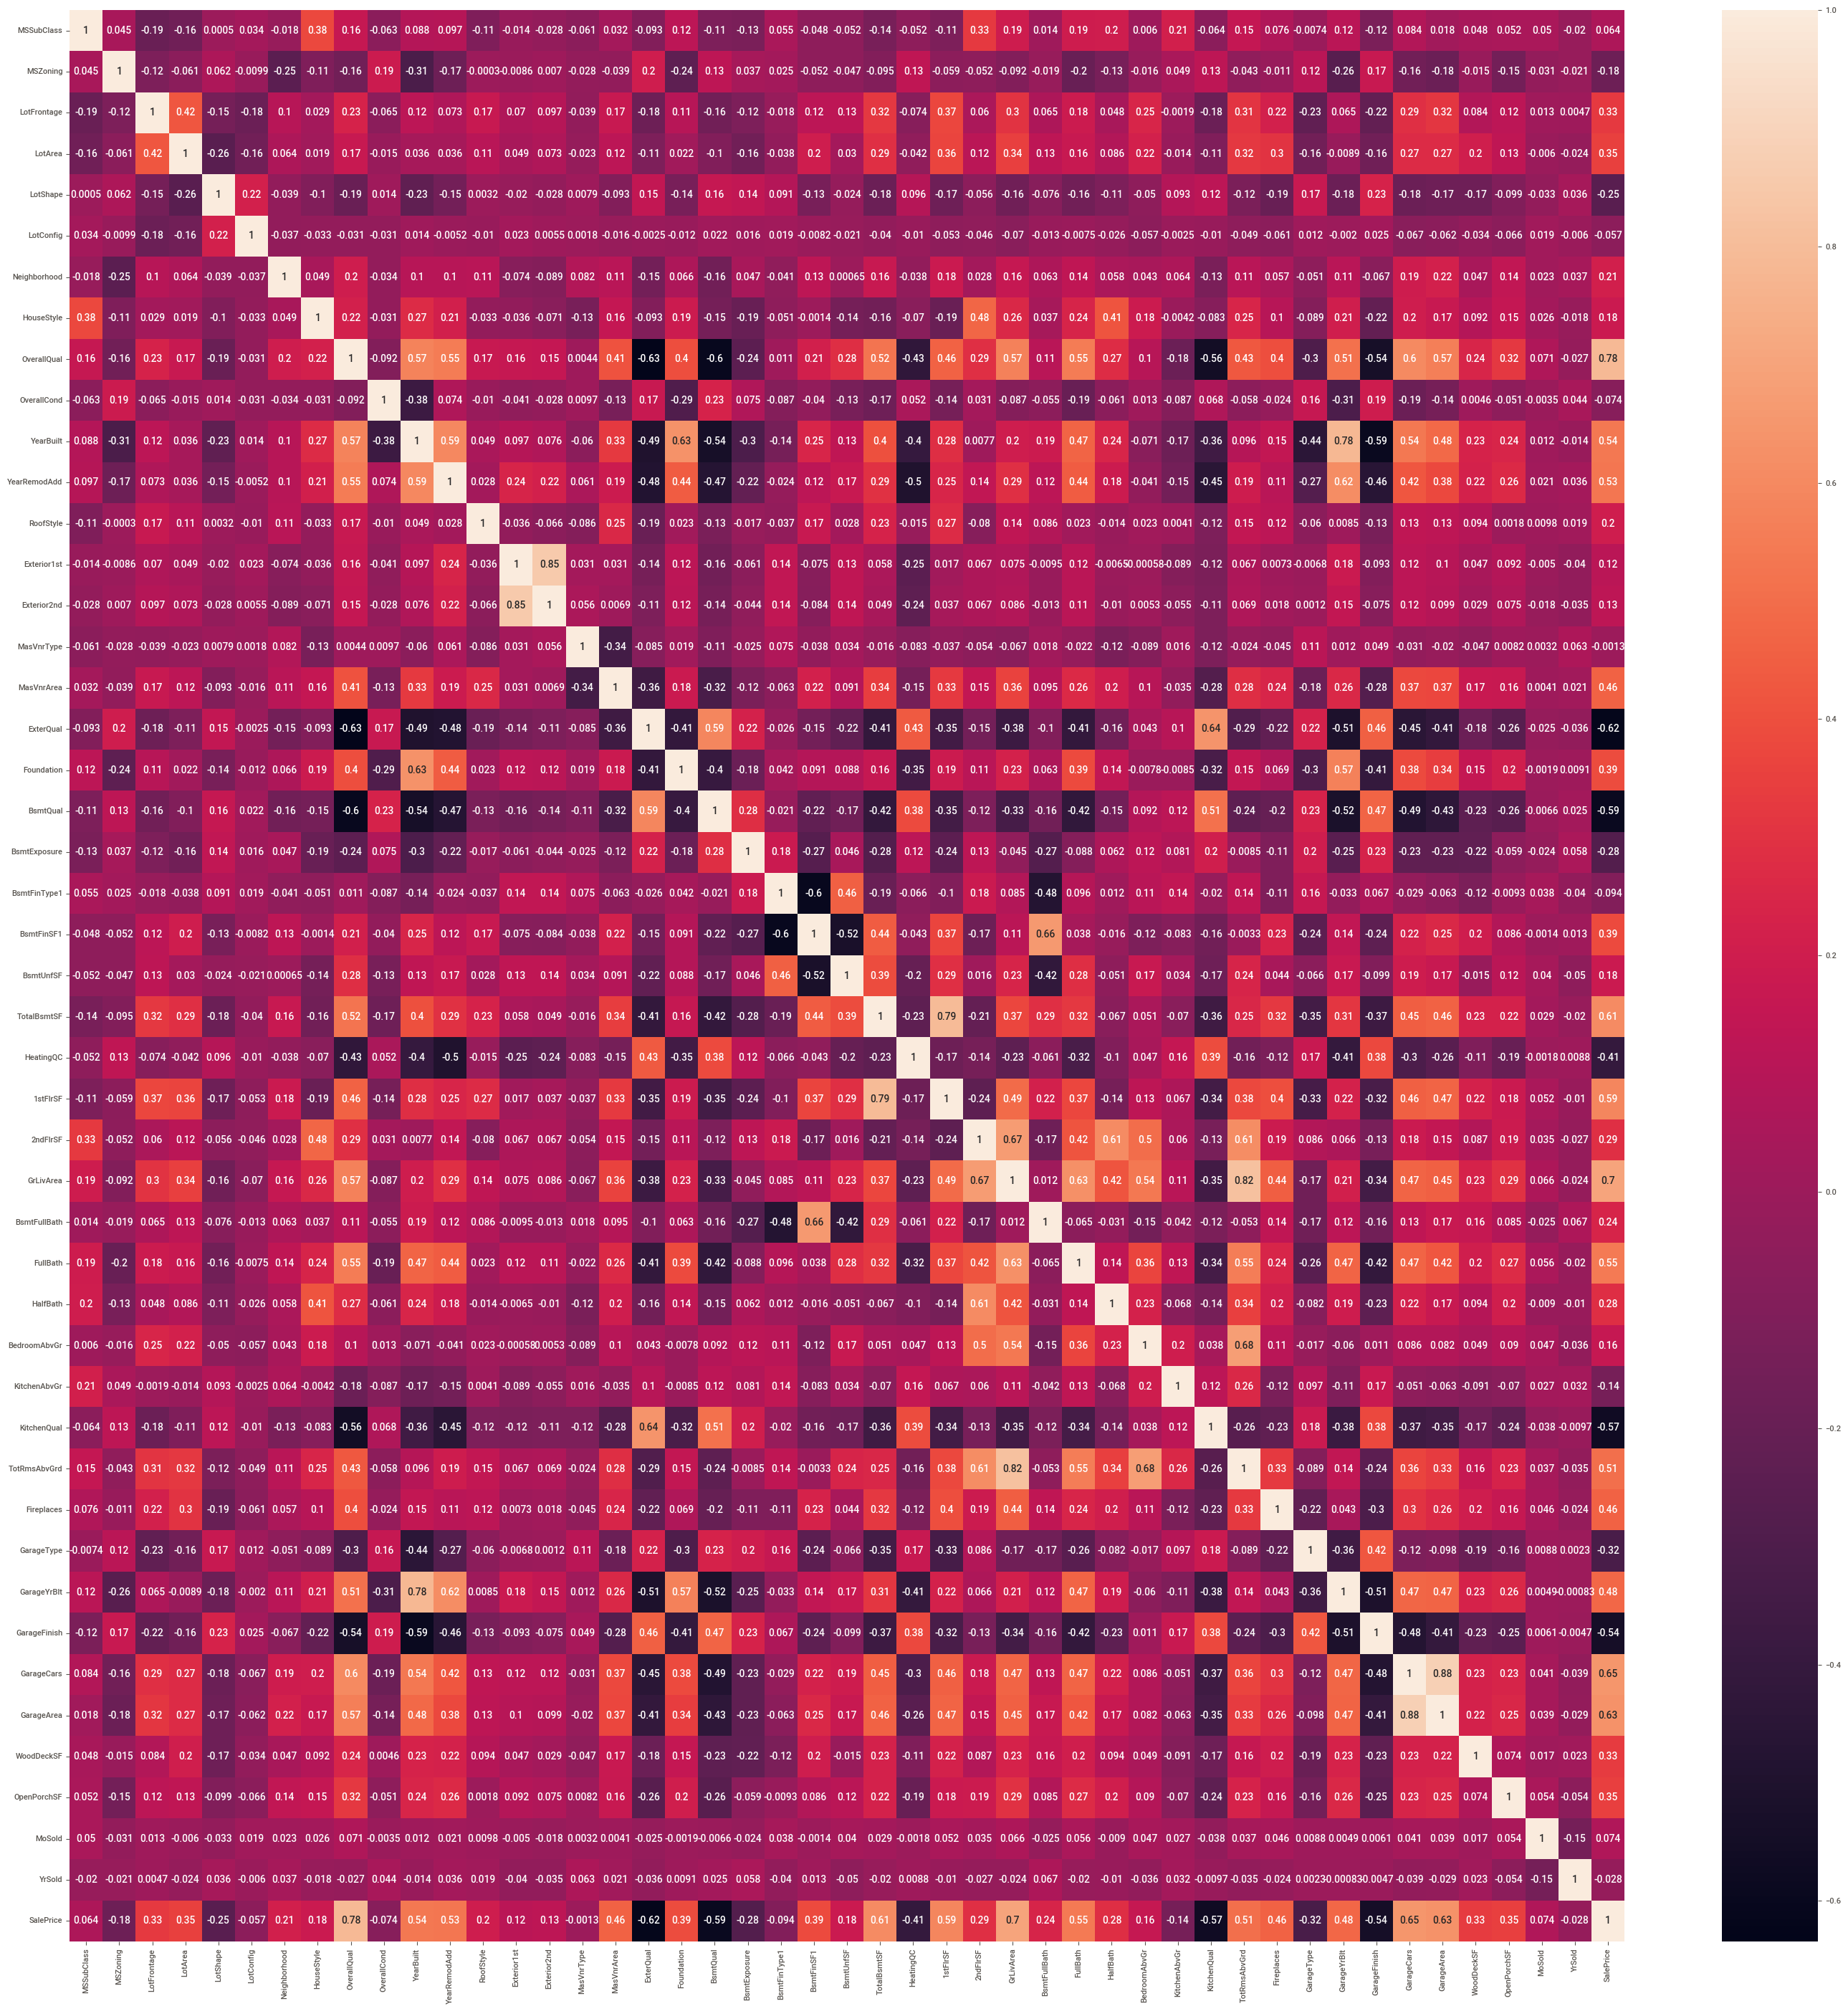

In [33]:
# plot a heatmap to see the correlation Graph
plt.figure(figsize=(35,35))             # figure Size
sns.heatmap(data.corr(),annot=True)     # Heat map with values
plt.show()

In [34]:
# Checking Corelation 
data.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
MSSubClass,1.000000,0.044591,-0.188864,-0.164045,0.000505,0.034354,-0.018281,0.378664,0.161724,-0.062602,0.087720,0.096634,-0.106445,-0.014392,-0.027864,-0.061253,0.032465,-0.092807,0.121661,-0.113710,-0.129753,0.054820,-0.047743,-0.052194,-0.135309,-0.052463,-0.111942,0.326702,0.192429,0.013546,0.193002,0.195707,0.005961,0.208767,-0.064157,0.152245,0.075763,-0.007449,0.117198,-0.120226,0.083879,0.017941,0.048125,0.051711,0.050456,-0.019514,0.064480
MSZoning,0.044591,1.000000,-0.115356,-0.061431,0.061887,-0.009895,-0.249679,-0.105315,-0.160099,0.186951,-0.308908,-0.174728,-0.000301,-0.008558,0.006963,-0.028279,-0.038908,0.200536,-0.235174,0.128245,0.037209,0.024688,-0.051570,-0.047273,-0.095142,0.134279,-0.058602,-0.051597,-0.092236,-0.018526,-0.198290,-0.133876,-0.016471,0.049434,0.128976,-0.043200,-0.011349,0.116007,-0.263772,0.167501,-0.157042,-0.183197,-0.014817,-0.153664,-0.031496,-0.020628,-0.180722
LotFrontage,-0.188864,-0.115356,1.000000,0.421688,-0.146959,-0.184409,0.100649,0.029477,0.228428,-0.064736,0.120852,0.073092,0.166967,0.070325,0.096548,-0.039370,0.167770,-0.176834,0.105466,-0.161216,-0.116706,-0.018341,0.124048,0.127722,0.320719,-0.074135,0.372357,0.060160,0.303533,0.064540,0.184696,0.047871,0.246611,-0.001857,-0.181607,0.310463,0.219769,-0.225715,0.065280,-0.216418,0.290181,0.315022,0.083622,0.122475,0.013433,0.004683,0.327949
LotArea,-0.164045,-0.061431,0.421688,1.000000,-0.255614,-0.159785,0.063694,0.019371,0.167705,-0.014674,0.036064,0.036155,0.112597,0.048521,0.073183,-0.022980,0.123804,-0.113944,0.021649,-0.100363,-0.161111,-0.038008,0.199120,0.029964,0.285668,-0.042025,0.364702,0.116026,0.343897,0.128582,0.164935,0.086121,0.215687,-0.013677,-0.109455,0.322829,0.300714,-0.157182,-0.008928,-0.164084,0.265882,0.272121,0.203758,0.134797,-0.005966,-0.023569,0.353798
LotShape,0.000505,0.061887,-0.146959,-0.255614,1.000000,0.221102,-0.038894,-0.104026,-0.190497,0.013693,-0.226062,-0.153825,0.003182,-0.020463,-0.027951,0.007946,-0.092530,0.148818,-0.135124,0.161208,0.140506,0.090615,-0.131254,-0.023507,-0.184674,0.096248,-0.170679,-0.056021,-0.164355,-0.076178,-0.159390,-0.111072,-0.050214,0.092520,0.122182,-0.119250,-0.194285,0.168451,-0.184599,0.231392,-0.183906,-0.170243,-0.168906,-0.098990,-0.033455,0.036449,-0.252521
LotConfig,0.034354,-0.009895,-0.184409,-0.159785,0.221102,1.000000,-0.036597,-0.032945,-0.031086,-0.030788,0.013629,-0.005161,-0.010364,0.023316,0.005546,0.001826,-0.015740,-0.002503,-0.011755,0.022063,0.015969,0.018824,-0.008152,-0.021178,-0.039930,-0.010217,-0.052797,-0.045757,-0.070304,-0.012951,-0.007531,-0.025804,-0.056574,-0.002500,-0.010437,-0.049246,-0.061043,0.011562,-0.001963,0.024764,-0.066967,-0.061634,-0.034272,-0.065744,0.018902,-0.005992,-0.056991
Neighborhood,-0.018281,-0.249679,0.100649,0.063694,-0.038894,-0.036597,1.000000,0.048595,0.196593,-0.033609,0.101289,0.102671,0.109937,-0.073718,-0.089222,0.081865,0.106478,-0.151595,0.066494,-0.159363,0.047120,-0.040925,0.127095,0.000646,0.164770,-0.038039,0.179236,0.027569,0.160549,0.063234,0.137909,0.057676,0.043033,0.064092,-0.128734,0.106580,0.057462,-0.050995,0.107949,-0.067240,0.194063,0.215800,0.047200,0.143971,0.023222,0.036697,0.209684
HouseStyle,0.378664,-0.105315,0.029477,0.019371,-0.104026,-0.032945,0.048595,1.000000,0.218440,-0.031329,0.270494,0.209973,-0.032629,-0.036445,-0.071003,-0.133506,0.156907,-0.092610,0.186051,-0.147126,-0.194951,-0.051174,-0.001433,-0.142823,-0.161134,-0.069916,-0.187787,0.475645,0.258267,0.

In [35]:
# Create a variable of corelation only with target Class
Less_corr = data.corr().sort_values(by=['SalePrice'],ascending=False)[['SalePrice']]
Less_corr

,SalePrice
SalePrice,1.000000
OverallQual,0.784524
GrLivArea,0.702360
GarageCars,0.647860
GarageArea,0.631120
TotalBsmtSF,0.610056
1stFlrSF,0.588536
FullBath,0.545606
YearBuilt,0.539897
YearRemodAdd,0.527739


In [36]:
# Display Variable which  has range between (-0.1 to +0.1) Corelation with Target Class

Less_corr.loc[(Less_corr['SalePrice']>-0.1) & (Less_corr['SalePrice']<0.1)]

,SalePrice
MoSold,0.074401
MSSubClass,0.064480
MasVnrType,-0.001306
YrSold,-0.027528
LotConfig,-0.056991
OverallCond,-0.073967
BsmtFinType1,-0.093670


In [37]:
# Which columns has low correlation with target , they dont Affect target , so we drop them.
Less_corr_column = ['MoSold','MSSubClass','MasVnrType','YrSold','LotConfig','OverallCond','BsmtFinType1']
data = data.drop(Less_corr_column,axis=1)

In [38]:
# Check Duplicate VAlues & Drop them
data.duplicated().sum()

0

In [39]:
data.shape

(1460, 40)

In [40]:
# Create Dependent and Independent variable
X = data.drop('SalePrice',axis=1)
y = data['SalePrice']

# Model Creation & Evaluation

In [41]:
# Split data into Train & Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [42]:
# Import Required Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# ( a ) .  Linear Regression :-

In [43]:
from sklearn.linear_model import LinearRegression   # Import Linear Regression
Lr = LinearRegression()                             # Create a variable of Linear Regression for Calling it
Lr.fit(X_train,y_train)                             # Fit the Model
y_pr_lr = Lr.predict(X_test)                        # Predict the X_test

In [44]:
# print predicted values
y_pr_lr

array([161910.58903506, 177243.34366929, 182160.23701671, 168441.91250491,
       117811.57474288, 220617.30334841,  75445.58508332, 395975.45263921,
       110787.11892882, 314991.9844769 , 202196.13322414, 241267.022788  ,
       221468.19333892, 172093.18782931, 120876.50387968,  62442.48946654,
       137169.04577572, 169794.16546591, 111130.27186946, 151951.49264178,
       283413.07918715, 127633.4331604 , 183346.33282977, 273407.25015004,
       132605.98470428, 108348.65712741,  63669.59231091, 105706.15478185,
       166247.70763492, 182836.72425877,  94219.57101439, 317732.88827688,
        81217.50946947, 181193.48825715, 198878.45465866, 231928.34051383,
       169378.95425419, 222663.62736019, 157288.6079366 , 137076.11259331,
       207981.19489729, 103801.37241585, 230102.20058583, 190897.30815861,
       115927.60055945, 187197.52354782, 122214.16408244, 180564.95581839,
       190709.91765987, 205109.98102179,  80873.21664101, 159437.42723715,
       189513.43016609, 1

In [45]:
# Print actual values of y_test
y_test.values

array([186000, 214500, 177000, 185000,  60000, 223500,  64500, 437154,
       135000, 440000, 182900, 207500, 257500, 164500, 121000,  34900,
       145000, 175000,  79900, 118500, 297000, 139000, 160000, 328000,
       125000,  80000,  86000, 128500, 143000, 165500, 109500, 369900,
        94000, 149500, 213490, 252678, 188000, 224000, 161500, 155000,
       167500, 136000, 242000, 196500, 154900, 155000, 137000, 136000,
       215200, 280000,  93000, 152000, 178000, 171750, 359100, 326000,
       380000,  79900, 224500, 156000, 132250,  95000, 255500, 105000,
       131500, 197000,  75500, 256300, 170000, 151000, 176000, 109008,
       152000, 215000, 132500, 181000, 155000, 174000, 207000, 135000,
       115000, 225000, 120500, 155000, 202900, 169000, 173000, 277500,
       197500, 157000, 154300, 110000, 120500, 260000,  84900, 205000,
       301000, 139000, 101800, 149900,  89500, 265900, 120500,  67000,
       195000,  90000, 135000, 140000, 354000, 136000, 196000, 207000,
      

In [46]:
# Calculate Mean Square Error
mse_lr = mean_squared_error(y_test,y_pr_lr)
mse_lr

698967789.5764496

In [47]:
# Calculate Mean Absolute Error
mae_lr = mean_absolute_error(y_test,y_pr_lr)
mae_lr

18417.525340513872

In [48]:
# Calculate r2 Score
r2_lr = r2_score(y_test,y_pr_lr)
r2_lr

0.8659270392585449

In [49]:
Adjusted_r2_lr = 1 - (1-r2_lr)*(len(data)-1) / (len(data) - len(data.columns) -1)
Adjusted_r2_lr

0.8621476746146701

# ( b ) . K Nearest Neighbour :-

In [50]:
## taking optimal k to determine how many nearest neighbors  to create
from sklearn.neighbors import KNeighborsRegressor

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):    # start of loop from 1- to 10
    knn = KNeighborsRegressor(n_neighbors=i)   # object creation
    knn.fit(X_train,y_train)    # x_train for distance   And y_train used for getting estimate from neighbour
    pred_i = knn.predict(X_test)  # obtain estimates for i neighbours
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

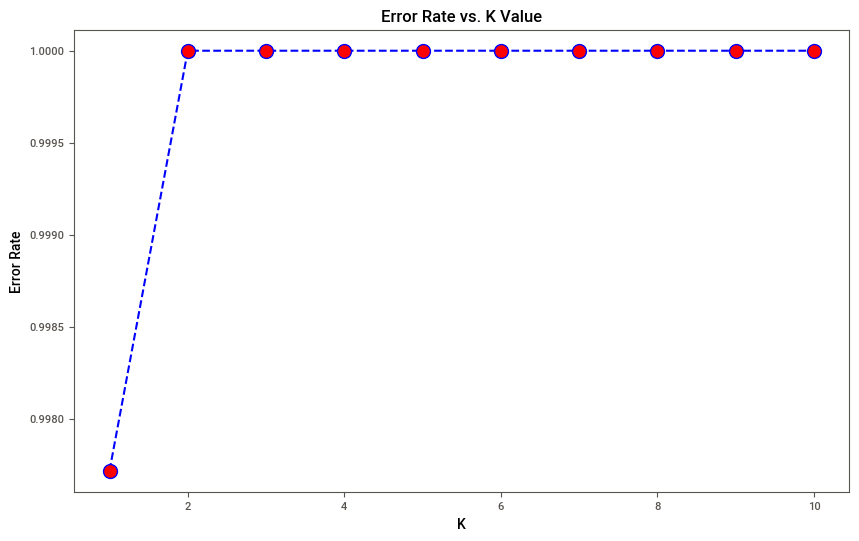

In [51]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [52]:
from sklearn.neighbors import KNeighborsRegressor      # Import KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)                            # cREATE A VARIABLE OF knn FOR Calling it
knn.fit(X_train,y_train)                               # fit the Model
y_pr_knn = knn.predict(X_test)                         # Predict the Target

# Calculate r2 Score
r2_knn = r2_score(y_test,y_pr_knn)
print("R2 Score of KNN is : ",r2_knn)

R2 Score of KNN is :  0.7003985253949816


In [53]:
Adjusted_r2_knn = 1 - (1-r2_knn)*(len(data)-1) / (len(data) - len(data.columns) -1)
Adjusted_r2_knn

0.6919530997542482

In [54]:
print(f'Mean Square Error of KNN = {mean_squared_error(y_test,y_pr_knn)}')
print(f'Mean Absolute Error of KNN = {mean_absolute_error(y_test,y_pr_knn)}')

Mean Square Error of KNN = 1561924039.7199998
Mean Absolute Error of KNN = 27700.43744292238


### Hyper Parameter of K_Nearest_Neighbour

In [55]:
# Define Hyperparameter
hyperpara_knn = [{'n_neighbors':list(np.arange(2,11)) ,   # number of neighbour 
            'weights':['distance','uniform'] }]       # calculate distance 

# import Grid Search from sklearn's Model_selection
from sklearn.model_selection import GridSearchCV
grid_knn = GridSearchCV(estimator=knn,param_grid=hyperpara_knn,cv=7,scoring='r2') # define Gridsearch with parameters 
grid_knn.fit(X_train,y_train)                                                 # Train / fit Model

GridSearchCV(cv=7, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['distance', 'uniform']}],
             scoring='r2')

In [56]:
print("Best Parameters : ",grid_knn.best_params_ )                 # print best parameters
print("Best Score : ",grid_knn.best_score_  )                      # Print best score

Best Parameters :  {'n_neighbors': 7, 'weights': 'distance'}
Best Score :  0.6070746986345176


In [57]:
from sklearn.neighbors import KNeighborsRegressor             # Import KNN regressor
knn_hyp = KNeighborsRegressor(n_neighbors=5,weights='distance')   # Create a variable oF knn FOR Calling it
knn_hyp.fit(X_train,y_train)                                      # fit the Model
y_hyp_knn = knn_hyp.predict(X_test)                               # Predict the Target

# Calculate r2 Score
r2_knn_hyp = r2_score(y_test,y_hyp_knn)
print("R2 Score of KNN is : ",r2_knn_hyp)

R2 Score of KNN is :  0.712202617610743


In [58]:
Adjusted_r2_knn_hyp = 1 - (1-r2_knn_hyp)*(len(data)-1) / (len(data) - len(data.columns) -1)
Adjusted_r2_knn_hyp

0.7040899359366273

## ( c ) . Support Vector Machine :-

In [59]:
from sklearn.svm import SVR        # import support vector regressor
svr = SVR()                        # create  a object of support vector
svr.fit(X_train,y_train)           # train the SVR model
y_pr_svr = svr.predict(X_test)     # predict y
r2_svr = r2_score(y_test,y_pr_svr)
r2_svr

-0.053557329140707655

In [60]:
Adjusted_r2_svr = 1 - (1-r2_svr)*(len(data)-1) / (len(data) - len(data.columns) -1)
Adjusted_r2_svr

-0.08325591488110806

### Hyper Parameter of Support Vector

In [61]:
# Define hyperparameters 
hyperpara_svr = [{'kernel' : ['linear', 'rbf'],
              'C':[1,0.1,0.001,0.0001,0.00001],
              'gamma':[1,0.1,0.001,0.0001,0.00001] }]

# import Grid Search cv
from sklearn.model_selection import GridSearchCV
grid_svr = GridSearchCV(estimator=svr,
                   param_grid=hyperpara_svr,
                   cv=3,
                   scoring='r2')    # Define Grid with parameters
grid_svr.fit(X_train,y_train)           # Train grid 

print("Best Parameters : ",grid_svr.best_params_ )                 # print best parameters
print("Best Score : ",grid_svr.best_score_  )                      # Print best score

Best Parameters :  {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Best Score :  0.7485936935902352


In [62]:
from sklearn.svm import SVR                                 # import support vector regressor
svr_hyp = SVR(C= 1, gamma= 1, kernel= 'linear')                 # create  a object of support vector with best parameters
svr_hyp.fit(X_train,y_train)                                    # train the SVR model
y_hyp_svr = svr_hyp.predict(X_test)                             # predict y
r2_svr_hyp = r2_score(y_test,y_hyp_svr)
print("R2 Score of SVR with hyperparameter is : ",r2_svr_hyp)

R2 Score of SVR with hyperparameter is :  0.8086980214395884


In [63]:
Adjusted_r2_svr_hyp = 1 - (1-r2_svr_hyp)*(len(data)-1) / (len(data) - len(data.columns) -1)
Adjusted_r2_svr_hyp

0.8033054357155457

## ( d ) . Decision Tree :-

In [64]:
from sklearn.tree import DecisionTreeRegressor     # import Decision Tree
dtree = DecisionTreeRegressor(random_state=23)                    # make a object of Decision tree
dtree.fit(X_train,y_train)                         # fit Decision tree
y_pr_tree = dtree.predict(X_test)                  # predict
r2_tree = r2_score(y_test,y_pr_tree)               # Calculate R2 score
r2_tree

0.7808771810312176

In [65]:
Adjusted_r2_tree = 1 - (1-r2_tree)*(len(data)-1) / (len(data) - len(data.columns) -1)
Adjusted_r2_tree

0.7747003573816396

### Hyperparameter of Decision Tree

In [66]:
hyperpara_tree = [{'criterion':["squared_error","absolute_error"],  # quality of split
    'splitter':['best', 'random'],            # features for split
    'max_depth':list(np.arange(1,20)),        # depth of tree
    'min_samples_split':[2,5,7],              # the minimum number of samples required to split internal node
    'min_samples_leaf':list(np.arange(1,20))  #  minimum number of samples required to be at a leaf node
             }]
# import GridSearch
from sklearn.model_selection import GridSearchCV
grid_tree = GridSearchCV(estimator=dtree,
                   param_grid=hyperpara_tree,
                   verbose=1,cv=3,
                    scoring='r2',
                    n_jobs=-1 )          # define grid with best parameters
grid_tree.fit(X_train,y_train)                # Train data with Gridsearch


print("Best Parameters : ",grid_tree.best_params_ )                 # print best parameters
print("Best Score : ",grid_tree.best_score_  )       

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best Parameters :  {'criterion': 'absolute_error', 'max_depth': 9, 'min_samples_leaf': 9, 'min_samples_split': 2, 'splitter': 'best'}
Best Score :  0.7133880383500514


In [67]:
from sklearn.tree import DecisionTreeRegressor      # import Decision Tree
dtree_hyp = DecisionTreeRegressor(criterion = 'squared_error', 
                              max_depth = 8, 
                              min_samples_leaf = 12, 
                              min_samples_split = 2, 
                              splitter = 'best',
                              random_state=1
                             )            # make a object of Decision tree with best parameters
dtree_hyp.fit(X_train,y_train)                         # Train Decision tree
y_hyp_tree = dtree_hyp.predict(X_test)                  # predict
r2_tree_hyp = r2_score(y_test,y_hyp_tree)               # Calculate R2 score
r2_tree_hyp

0.7931669832657255

In [68]:
Adjusted_r2_tree_hyp = 1 - (1-r2_tree_hyp)*(len(data)-1) / (len(data) - len(data.columns) -1)
Adjusted_r2_tree_hyp

0.7873365951971061

# ( e ) . Random Forest :-

In [69]:
from sklearn.ensemble import RandomForestRegressor  # import random forest
r_for = RandomForestRegressor(random_state=33)       # define random forest with random state
r_for.fit(X_train,y_train)                          # Train the random forest model
y_pr_forest = r_for.predict(X_test)                 # predict y
r2_forest = r2_score(y_test,y_pr_forest)            # Check performance
r2_forest

0.8812541500007699

In [70]:
Adjusted_r2_forest = 1 - (1-r2_forest)*(len(data)-1) / (len(data) - len(data.columns) -1)
Adjusted_r2_forest

0.8779068392185506

### Hyperparameter of Random Forest

In [71]:
# Define Hyperparameter's
hyperpara_forest = [{
    'n_estimators':[int(x) for x in np.linspace(start=200, stop=2000, num=10)], # no.of tree build before prediction
    'max_depth':list(int(x) for x in np.linspace(10, 110, num=11)),             # max depth a tree will go
    'min_samples_split':[3,5,7,9],                                              # max a sample leaf will split
    'min_samples_leaf':[1,3,5],                                                 # minimum sample for a leaf
    'max_features':['auto', 'sqrt'],                                            # max features for split
    'bootstrap':[True,False],
}]

# import Randomized search
from sklearn.model_selection import RandomizedSearchCV
random_grid = RandomizedSearchCV(estimator=r_for,param_distributions=hyperpara_forest,cv=3,verbose=1,
                                 n_iter=150,n_jobs=-1
                                )                 # Define random grid with required parameters

random_grid.fit(X_train,y_train)                         # Train data with random grid

print("Best Parameters : ",random_grid.best_params_ )                 # print best parameters
print("Best Score : ",random_grid.best_score_  )                      # print best Score

Fitting 3 folds for each of 150 candidates, totalling 450 fits
Best Parameters :  {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
Best Score :  0.7991307981825742


In [72]:
from sklearn.ensemble import RandomForestRegressor   # import random forest
r_for_hyp = RandomForestRegressor(n_estimators=250,
                              max_depth=40,
                              min_samples_split=7,
                              min_samples_leaf=3,
                              max_features='auto',
                              bootstrap=True
                            )                      # define random forest with best parameters
r_for_hyp.fit(X_train,y_train)                           # train data with best parameters
y_hyp_forest = r_for_hyp.predict(X_test)                 # predict y
r2_forest_hyp = r2_score(y_test,y_hyp_forest)        # check performance
print("R2 score of Random forest after Hyperparameter : ",r2_forest_hyp)

R2 score of Random forest after Hyperparameter :  0.8832405282716262


In [73]:
Adjusted_r2_for_hyp = 1 - (1-r2_forest_hyp)*(len(data)-1) / (len(data) - len(data.columns) -1)
Adjusted_r2_for_hyp

0.879949211239114

## ( f ) . Gradient Boosting :-

In [74]:
from sklearn.ensemble import GradientBoostingRegressor    # importGradient Boosting 
gbr = GradientBoostingRegressor(random_state=11)                        # Create object of Gradient Boost
gbr.fit(X_train,y_train)                                 # Train model with Default Parameters
y_pr_gbr = gbr.predict(X_test)                           # predict y
r2_gbr = r2_score(y_test,y_pr_gbr)                       # check performance
print('R2 Score of Gradient Boosting : ',r2_gbr)

R2 Score of Gradient Boosting :  0.8860118316847255


In [75]:
Adjusted_r2_gbr = 1 - (1-r2_gbr)*(len(data)-1) / (len(data) - len(data.columns) -1)
Adjusted_r2_gbr

0.8827986345511025

### Hyperparameter of Gradient Boosting

In [76]:
# Define hyperparameter
hyperpara_gboost = [{
    'learning_rate':[0.1,0.01,0.001,0.0001],                    # learning rate
    'n_estimators':[100,200,300,400,500],                       # number of estimator
    'min_samples_split':[2,4,6],                                # minimum sample required
    'min_samples_leaf':[1,3,5],                                 # minimum sample for leaf node
    'max_depth':[int(x) for x in np.linspace(10,110,num=11)],   # maximum depth tree will go
    'max_features':['auto', 'sqrt']                             # max feature type
}]

# Import Randomized Search
from sklearn.model_selection import RandomizedSearchCV
Random_boost = RandomizedSearchCV(estimator=gbr,param_distributions=hyperpara_gboost,
                               cv=3,verbose=3,n_jobs=-1,scoring='r2',n_iter=150) # define random search with all parameters

Random_boost.fit(X_train,y_train)                                       # train data with all parameters

print("Best Parameters : ",Random_boost.best_params_ )                  # print best parameters
print("Best Score : ",Random_boost.best_score_  )                       # print best score

Fitting 3 folds for each of 150 candidates, totalling 450 fits
Best Parameters :  {'n_estimators': 400, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 80, 'learning_rate': 0.01}
Best Score :  0.8010929861726647


In [77]:
from sklearn.ensemble import GradientBoostingRegressor  # import Gradient Boosting Regressor
gbr_hyp = GradientBoostingRegressor(
                                learning_rate=0.1,
                                n_estimators=400,
                                min_samples_split=2,
                                min_samples_leaf=5,
                                max_depth=4,
                                max_features='sqrt',
                               random_state=9)   # define Gradient boost with best parameters
gbr_hyp.fit(X_train,y_train)                                # train data with best parameters
y_hyp_gbr = gbr_hyp.predict(X_test)                       # predict y
r2_gbr_hyp = r2_score(y_test,y_hyp_gbr)                 # check performance
print("R2 score of G- Boost after Hyperparameter : ",r2_gbr_hyp)

R2 score of G- Boost after Hyperparameter :  0.9019734286788489


In [78]:
Adjusted_r2_gbr_hyp = 1 - (1-r2_gbr_hyp)*(len(data)-1) / (len(data) - len(data.columns) -1)
Adjusted_r2_gbr_hyp

0.8992101708544331

## ( g ) . XG-Boosting :-

In [79]:
from xgboost import XGBRegressor             # import XGB regressor
xgb = XGBRegressor(random_state=1)                         # create a object of XGB
xgb.fit(X_train,y_train)                     # train data with by default parameter
y_pr_xgb = xgb.predict(X_test)               # predict y
r2_xgb = r2_score(y_test,y_pr_xgb)           # Check performance
print("R2 score of XGB : ",r2_xgb)

R2 score of XGB :  0.8655778486170185


In [80]:
Adjusted_r2_xgb = 1 - (1-r2_xgb)*(len(data)-1) / (len(data) - len(data.columns) -1)
Adjusted_r2_xgb

0.8617886406851515

### Hyperparameter of XG - Boost

In [82]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [1,0.1,0.2,0.3,0.001,0.0001],
              'learning_rate': [ 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [100,150,200,250,300],
              'reg_alpha': [0.1,0.2,0.4,0.8,1.6,3.2,6.4],
              'reg_lambda': [0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

random_cv_xgb = RandomizedSearchCV(estimator=xgb, scoring='r2',param_distributions=param_grid, n_iter=100, cv=3,verbose=1,
                              random_state=42, n_jobs=-1)

random_cv_xgb.fit(X_train,y_train)

print("XGB best score : ",random_cv_xgb.best_score_)
print("XGB best parameter : ",random_cv_xgb.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
XGB best score :  0.7836204066791166
XGB best parameter :  {'reg_lambda': 0.2, 'reg_alpha': 0.8, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.0001}


In [85]:
xgb_hyp=XGBRegressor(reg_lambda= 0.2, reg_alpha= 0.8, n_estimators=300, max_depth=6, learning_rate=0.2, gamma=0.0001)
xgb_hyp.fit(X_train, y_train)               # training 
y_hyp_xgb=xgb_hyp.predict(X_test)           # testing
r2_xgb_hyp=r2_score(y_test,y_hyp_xgb)      # checking performance
r2_xgb_hyp

0.8777663444909904

In [86]:
Adjusted_r2_xgb_hyp = 1 - (1-r2_xgb_hyp)*(len(data)-1) / (len(data) - len(data.columns) -1)
Adjusted_r2_xgb_hyp

0.874320716428721

## ( h ) . Artificial Neural Network :-

In [87]:
from sklearn.neural_network import MLPRegressor        # import Artificial neural for Regression
ann = MLPRegressor(random_state=8)                                   # Create object of ANN 
ann.fit(X_train,y_train)                               # Train data with ANN
y_pr_ann = ann.predict(X_test)                         # predict y
r2_ann = r2_score(y_test,y_pr_ann)                     # Check r2 Score
print("R2 score of ANN :",r2_ann)

R2 score of ANN : 0.644038691032589


In [88]:
Adjusted_r2_ann = 1 - (1-r2_ann)*(len(data)-1) / (len(data) - len(data.columns) -1)
Adjusted_r2_ann

0.6340045456071511

### Hyperparameter of Artificial Neural Network

In [89]:
# Define Hyperparameters
hyperpara_ann = [{
    'hidden_layer_sizes':[100,200,300],                           # hidden layer size
    'activation':['relu','identity'],                             # Activation 
    'alpha':[0.0001,0.001,0.01,0.1],
    'batch_size':[100,200,300], 
    'learning_rate_init':[0.001,0.01,0.1,1],                       # learning rate 
    'max_iter':[200,300,400]                                      # max iteration
    }]

# import Randomized search
from sklearn.model_selection import RandomizedSearchCV
random_grid_ann = RandomizedSearchCV(estimator=ann,
                                param_distributions=hyperpara_ann,
                                verbose=2,cv=3,
                                n_jobs=-1,n_iter=200,scoring='r2',
                                    random_state=1) # define Random grid with parameters

random_grid_ann.fit(X_train,y_train)                                   # Train data with Randomized cv

print("Best Parameters : ",random_grid_ann.best_params_ )              # print best parameters
print("Best Score : ",random_grid_ann.best_score_  )                   # print best Score

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Best Parameters :  {'max_iter': 400, 'learning_rate_init': 0.01, 'hidden_layer_sizes': 300, 'batch_size': 100, 'alpha': 0.01, 'activation': 'relu'}
Best Score :  0.7403931233049789


In [94]:
from sklearn.neural_network import MLPRegressor           # Import Neural Regression
model = MLPRegressor( hidden_layer_sizes=(300),
                       learning_rate_init=0.01,
                       max_iter=400,random_state=4,
                      activation = 'relu',
                     alpha=0.01,
                     batch_size=100
                       )                          # model object creation with best parameters
model.fit(X_train,y_train)                        # training the data
y_hyp_ann = model.predict(X_test)                 # predict y
r2_ann_hyp = r2_score(y_test,y_hyp_ann)           # Check performance
print('R2 score of ANN is  :',r2_ann_hyp)

R2 score of ANN is  : 0.7785082933409058


In [95]:
Adjusted_r2_ann_hyp = 1 - (1-r2_ann_hyp)*(len(data)-1) / (len(data) - len(data.columns) -1)
Adjusted_r2_ann_hyp

0.7722646934350821

# RESULTS :-

In [96]:
Results = pd.DataFrame({'model':['Linear_Regression','K_nearest','Support vector','Decision tree',
                          'Random Forest','Gradient Boost','XG - Boost','Artificial Network'],
              
              
             'R2 Score':[r2_lr,r2_knn,r2_svr,r2_tree,r2_forest,r2_gbr,r2_xgb,r2_ann],
              
            'Adjusted R2':[Adjusted_r2_lr,Adjusted_r2_knn,Adjusted_r2_svr,Adjusted_r2_tree,
                           Adjusted_r2_forest,Adjusted_r2_gbr,Adjusted_r2_xgb,Adjusted_r2_ann],
              
               ' R2 Score ( HYP )':['Not Avl.',r2_knn_hyp,r2_svr_hyp,r2_tree_hyp,
                                 r2_forest_hyp,r2_gbr_hyp,r2_xgb_hyp,r2_ann_hyp] ,
                        
                'Adjusted R2( HYP )':['Not avl',Adjusted_r2_knn_hyp , Adjusted_r2_svr_hyp , Adjusted_r2_tree_hyp ,
                           Adjusted_r2_for_hyp , Adjusted_r2_gbr_hyp , Adjusted_r2_xgb_hyp , Adjusted_r2_ann_hyp] , 
                        
                    ' Mean Absolute Error': [mean_absolute_error(y_test,y_pr_lr) , mean_absolute_error(y_test,y_pr_knn) , 
                                      mean_absolute_error(y_test,y_pr_svr) , mean_absolute_error(y_test,y_pr_tree) ,
                                      mean_absolute_error(y_test,y_pr_forest) , mean_absolute_error(y_test,y_pr_gbr) ,
                                      mean_absolute_error(y_test,y_pr_xgb) , mean_absolute_error(y_test,y_pr_ann)] , 
                        
                        ' Mean Square Error': [mean_squared_error(y_test,y_pr_lr) , mean_squared_error(y_test,y_pr_knn) , 
                                      mean_squared_error(y_test,y_pr_svr) , mean_squared_error(y_test,y_pr_tree) ,
                                      mean_squared_error(y_test,y_pr_forest) , mean_squared_error(y_test,y_pr_gbr) ,
                                      mean_squared_error(y_test,y_pr_xgb) , mean_squared_error(y_test,y_pr_ann)] 
         
             })



In [97]:
Results

,model,R2 Score,Adjusted R2,R2 Score ( HYP ),Adjusted R2( HYP ),Mean Absolute Error,Mean Square Error
0,Linear_Regression,0.865927,0.862148,Not Avl.,Not avl,18417.525341,6.989678e+08
1,K_nearest,0.700399,0.691953,0.712203,0.70409,27700.437443,1.561924e+09
2,Support vector,-0.053557,-0.083256,0.808698,0.803305,54548.412636,5.492551e+09
3,Decision tree,0.780877,0.774700,0.793167,0.787337,23628.840183,1.142362e+09
4,Random Forest,0.881254,0.877907,0.883241,0.879949,16539.730068,6.190624e+08
5,Gradient Boost,0.886012,0.882799,0.901973,0.89921,16367.331840,5.942590e+08
6,XG - Boost,0.865578,0.861789,0.877766,0.874321,17120.457745,7.007882e+08
7,Artificial Network,0.644039,0.634005,0.778508,0.772265,31466.070226,1.855747e+09


# ___ Conclusion ___

Based on the above performance , the **Gradient Boost hyperparameter model** has the highest **R2 Score = 90 %** and **Adjusted R2 = 89.9 %** among all the models evaluated. It also has a relatively low **Mean Absolute Error (16367)** and **Mean Square Error (5.942590e+08)**, indicating better accuracy in predicting the target variable.

we also use **Linear Regression , Random forest** and   **XG - Boost model** which gives **R2 Score of 86 %** .

Therefore, I would **suggest**  the **Gradient Boost Hyperparameter** model for deployment.